In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import math

In [2]:
train = pd.read_csv('mnistTrain.csv', header = None)
test = pd.read_csv('mnistTest.csv', header = None)

In [3]:
train = train.loc[train[64].isin([1,5])].reset_index(drop=True)
test = test.loc[test[64].isin([1,5])].reset_index(drop=True)

In [4]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,0,0,13,14,0,0,0,0,0,...,0,0,0,1,11,9,0,0,0,1
1,0,2,13,16,16,16,15,2,0,8,...,0,0,2,16,16,6,0,0,0,5
2,0,0,8,14,1,0,0,0,0,0,...,4,0,0,7,16,16,16,12,5,1
3,0,0,0,0,9,16,4,0,0,0,...,0,0,0,0,0,12,16,6,0,1
4,0,0,5,16,16,3,0,0,0,0,...,0,0,0,3,15,15,1,0,0,5


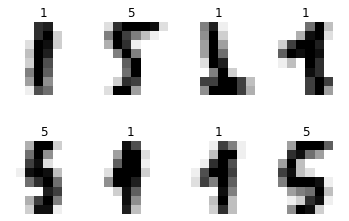

In [5]:
for index, row in train.head(8).iterrows():
    image = []
    for i in range(8):
        image.append(row[i*8:(i+1)*8])
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % row[64])

In [6]:
testTarget = test.iloc[:,-1]
testImage = test.iloc[:,0:-1]
trainTarget = train.iloc[:,-1]
trainImage = train.iloc[:,0:-1]

In [7]:
ink = trainImage.sum(axis=1) 

In [8]:
ink = ink - ink.min()
ink = ink/ink.max()

In [9]:
asymmetry = pd.Series()

In [10]:
for index, row in trainImage.iterrows():
    asym=0
    for i in range(4):
        asym+=abs(row[i]-row[7-i])
    asymmetry.at[index]=asym

In [11]:
asymmetry = asymmetry - asymmetry.min()
asymmetry = asymmetry/asymmetry.max()
trainProc = pd.concat([ink, asymmetry,trainTarget], axis=1)
trainProc.columns = ['ink','asymmetry','target']
trainProc.head()

,ink,asymmetry,target
0,0.082126,0.027027,1
1,0.429952,0.486486,5
2,0.410628,0.567568,1
3,0.531401,0.783784,1
4,0.357488,0.054054,5


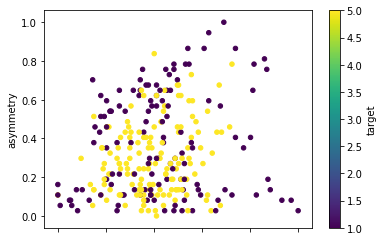

In [12]:
trainProc.plot(x ='ink', y='asymmetry',c='target',colormap='viridis' ,kind = 'scatter')	